In [ ]:
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and Data Visualization

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startups1 = startups.copy()

In [8]:
#rename the R&D Spend & Marketing Spend column names
startups = startups.rename({'R&D Spend': 'RnD_Spend','Marketing Spend':'Marketing_Spend'}, axis=1)

In [9]:
startups

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [11]:
startups.shape

(50, 5)

## Duplicated Rows

In [12]:
startups[startups.duplicated()]

,RnD_Spend,Administration,Marketing_Spend,State,Profit


In [ ]:
Since there are No Duplicated rows in the data set 

# Correlation Matrix

In [13]:
startups.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#Looking at Independent variable correlation : RnD_Spend ~ Marketing_Spend are moderately Positive correlated
# ANY Corelation VALUE for Independent variables which is close to +1 and -1  is a disaster because they are "Independent Variable"

## Scatterplot between variables

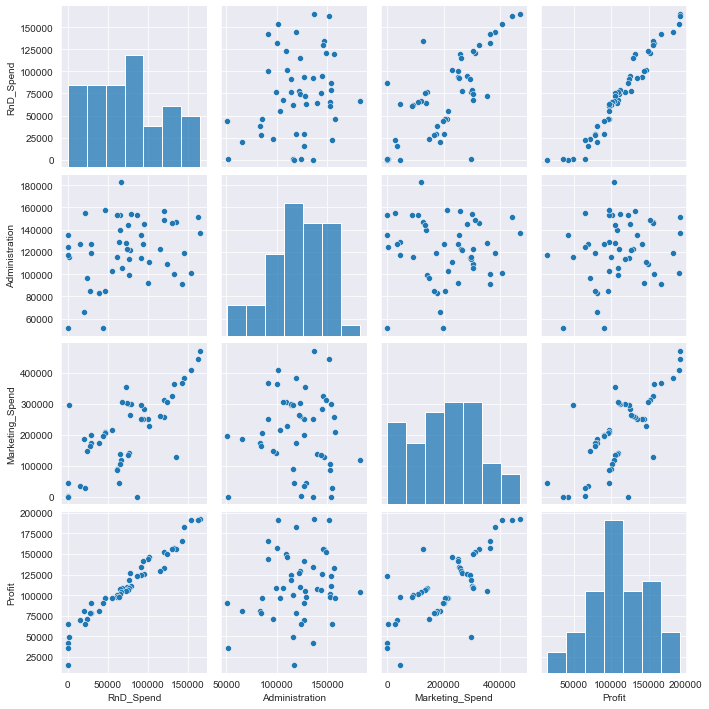

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

# Preparing a model

In [15]:
# First We will Do the Regression
#Build model  #Using OLS method -> Profit wrt all the Independent Variables
# import statsmodels.formula.api as smf 

model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=startups).fit()

In [17]:
# Pridected Values for Profit  Y^
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [18]:
model.resid     #errors e = Y(profit)  -  Y^(Pridicted profit)

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [19]:
model.rsquared
# We got R² 95% 

0.9507459940683246

# Model Testing

In [20]:
# Beta Coefficients
model.params

# Regression eqn : Profit(Y) = ßo + ß1*RnD_Spend + ß2*Administration + ß3*Marketing_Spend 
# ßo= 50122.19  ß1= 0.805715 , ß2=-0.026816, ß3=0.027228

Intercept          50122.192990
RnD_Spend              0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [21]:
# Finding tvalues/test stats  and pvalues
#Why t stats? ->Hypothesis: Ho :if pvalue >> 0.05: Not Significant-> says they are Not Contributing To each other So we try to remove one variable at a time and check the Significance again and conclude
#t and p-Values
# Check for pValues >> 0.05
model.tvalues , np.round(model.pvalues,5)  

# For Administration and Marketing_Spend >> 0.05 (both Should be dropped individually because they are Not Statistically significant)

(Intercept           7.626218
 RnD_Spend          17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 Intercept          0.00000
 RnD_Spend          0.00000
 Administration     0.60176
 Marketing_Spend    0.10472
 dtype: float64)

In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models and MLR

# SLR 
## individually for  Administration and Marketing_Spend wrt Profit(Y)

In [23]:
slr_admin = smf.ols('Profit~Administration', data = startups).fit()  
#t and p-Values
print(slr_admin.tvalues, '\n', slr_admin.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [ ]:
# here Administration > 0.05 ->It has Not significant pvalue

In [24]:
slr_mrktng = smf.ols('Profit~Marketing_Spend', data = startups).fit()  
#t and p-Values
print(slr_mrktng.tvalues, '\n', slr_mrktng.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [ ]:
# here Marketing_Spend  << 0.05 ->It has significant pvalue

# MLR 
## including Both for Administration and Marketing_Spend wrt Profit(Y)

In [25]:
mlr_am=smf.ols("Profit~Administration+Marketing_Spend", data=startups).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

In [ ]:
# varaibles have significant pvalues which are << 0.05

# Model Validation Techniques
## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [ ]:
# 1) Collinearity Problem Check
## Calculate VIF = 1/(1-Rsquare) for all independent variables

In [26]:
rsq_r=smf.ols("RnD_Spend~Administration+Marketing_Spend",data=startups).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RnD_Spend+Marketing_Spend",data=startups).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing_Spend~RnD_Spend+Administration",data=startups).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RnD_Spend','Administration','Marketing_Spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In [ ]:
# 2) method: Residual Analysis
## We use  Q-Q plot  Quantile Quantile Plots(Tets For Normality of residuals)

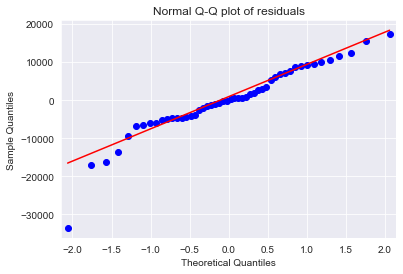

In [27]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

import statsmodels.api as sm
 
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
list(np.where(model.resid > 15000))    # outlier detection from above QQ plot of residuals

# for residual > 15000 (see the Y axis range)

[array([36, 45], dtype=int64)]

In [29]:
list(np.where(model.resid < -20000))

# for residual < -20000 

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [30]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
#Normalizing the data # User defined z = (x - mu)/sigma

def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()  

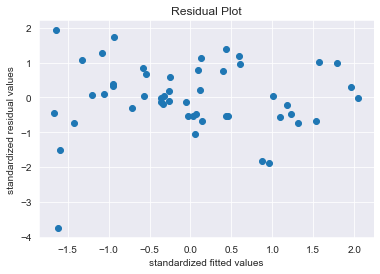

In [31]:
plt.scatter(standard_values(model.fittedvalues), #Y^ vs the residuals
            standard_values(model.resid))        #to see if the var is changing with Y^ or not
plt.title('Residual Plot')  
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

## Residual(errors) Vs Regressors(X1,X2.. or Predictors)

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-

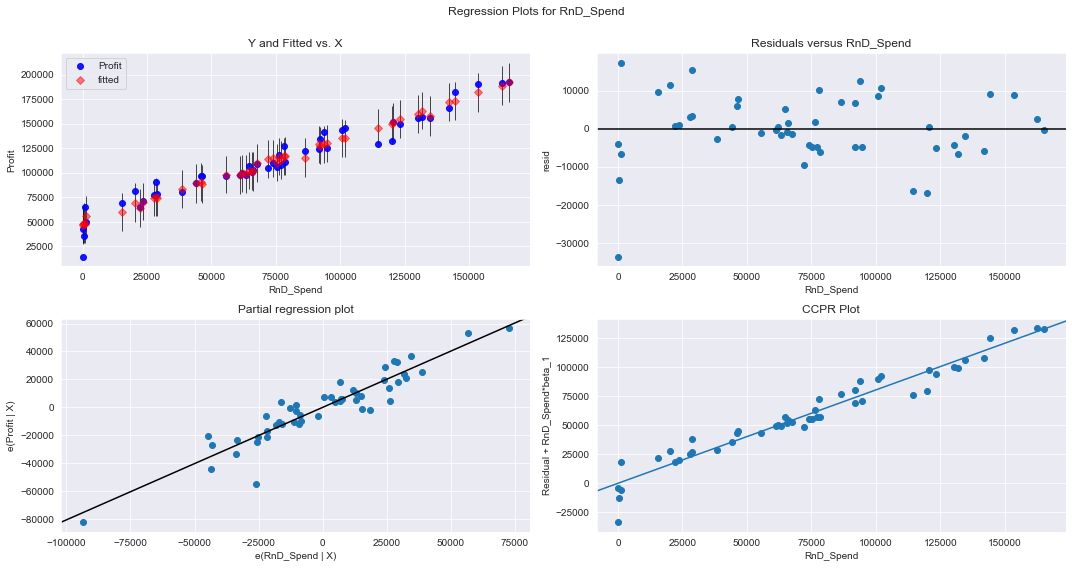

In [32]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'RnD_Spend', fig=fig) 
plt.show()

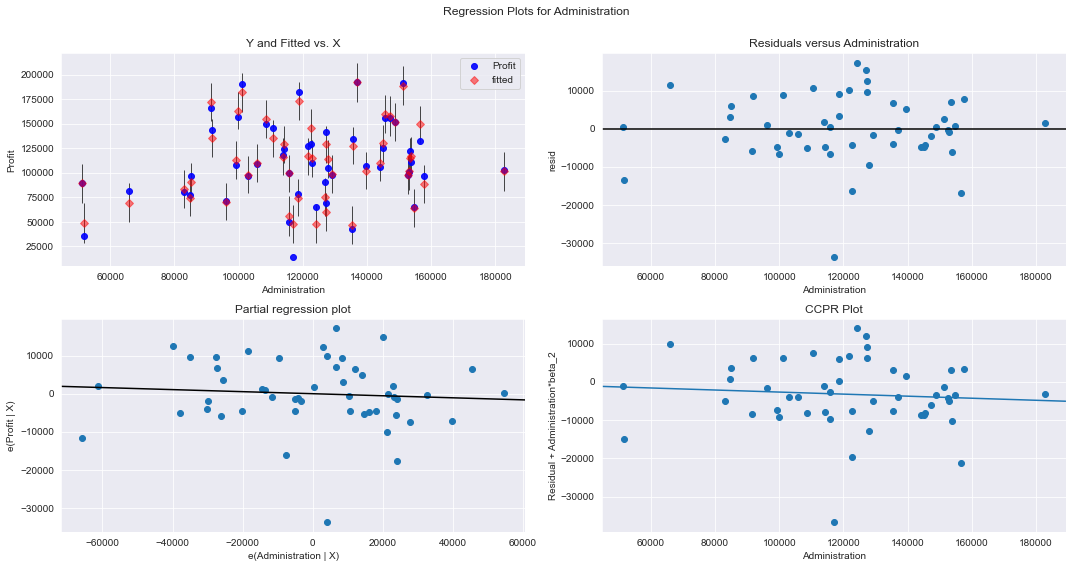

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

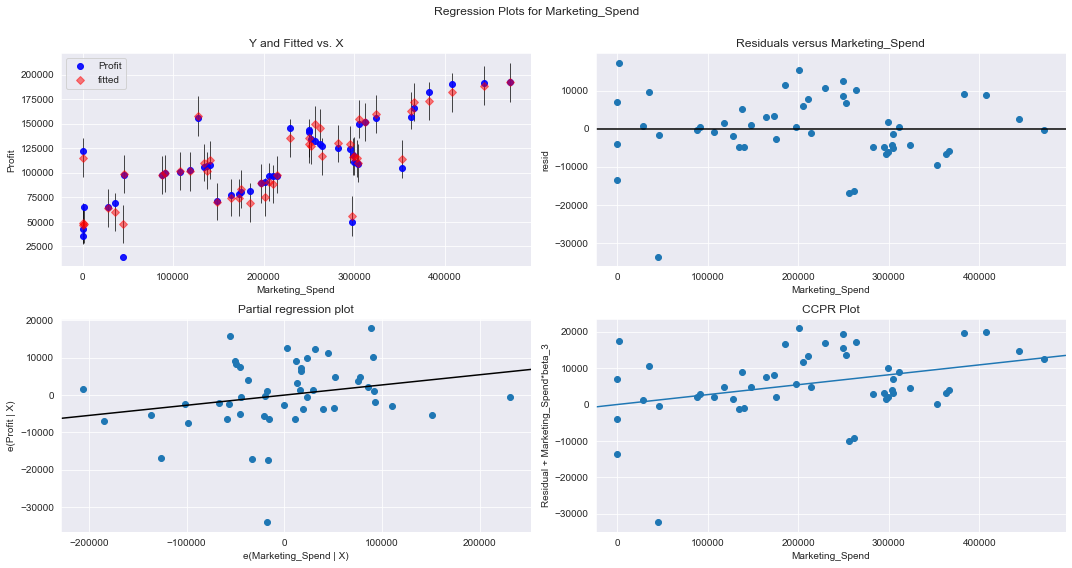

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

## Two Techniques : 1. Cook's Distance & 2. Leverage value
## 1st Method: Cook's Distance using Stem Plot

In [35]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [37]:
startups.shape

(50, 5)

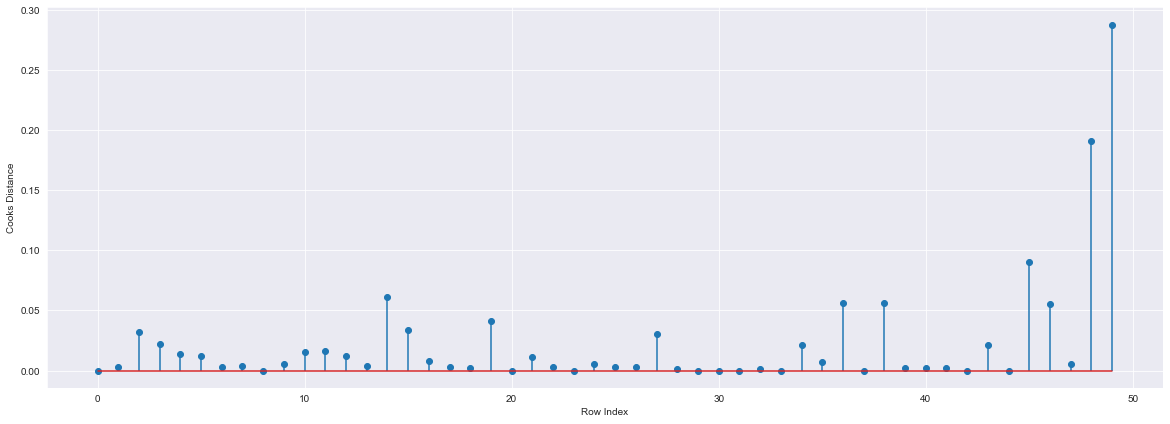

In [38]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
# Index and value of influencer where C>0.5 ->iterate this process till you dont get c < 0.5
np.argmax(c) , np.max(c)

#here c is < 0.5 , Stop Creating Models and Drop 49th observation


(49, 0.2880822927543263)

In [40]:
model.rsquared

0.9507459940683246

# 2nd method Leverage Value using High Influence Points: 
### Points beyond Leverage_cutoff value are influencers

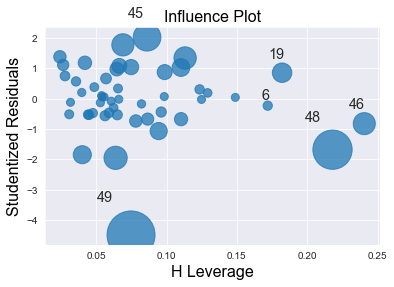

In [42]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

In [43]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startups.shape[1]
n=startups.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

#0.036 -Its a threshold value, In x axis :If distance is more that threshold its Outliers

0.36

# Improving the Model

In [ ]:
Since , np.argmax(c) = 49 we need to remove this row and check and Finalise the model

In [44]:
startups[startups.index.isin([49])] 

,RnD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [45]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startupsNew=startups.drop(startups.index[[49]],axis=0).reset_index(drop=True)
startupsNew

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
startupsNew.shape

(49, 5)

# Build the Model using startupsNew

In [60]:
final_model = smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend',data=startupsNew).fit()
np.round(final_model.pvalues,5)

Intercept          0.00000
RnD_Spend          0.00000
Administration     0.60707
Marketing_Spend    0.07458
dtype: float64

In [61]:
model_influence = final_model.get_influence()
(c1, _) = model_influence.cooks_distance #here Cooks Distances are Storing in variable c)
c1

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

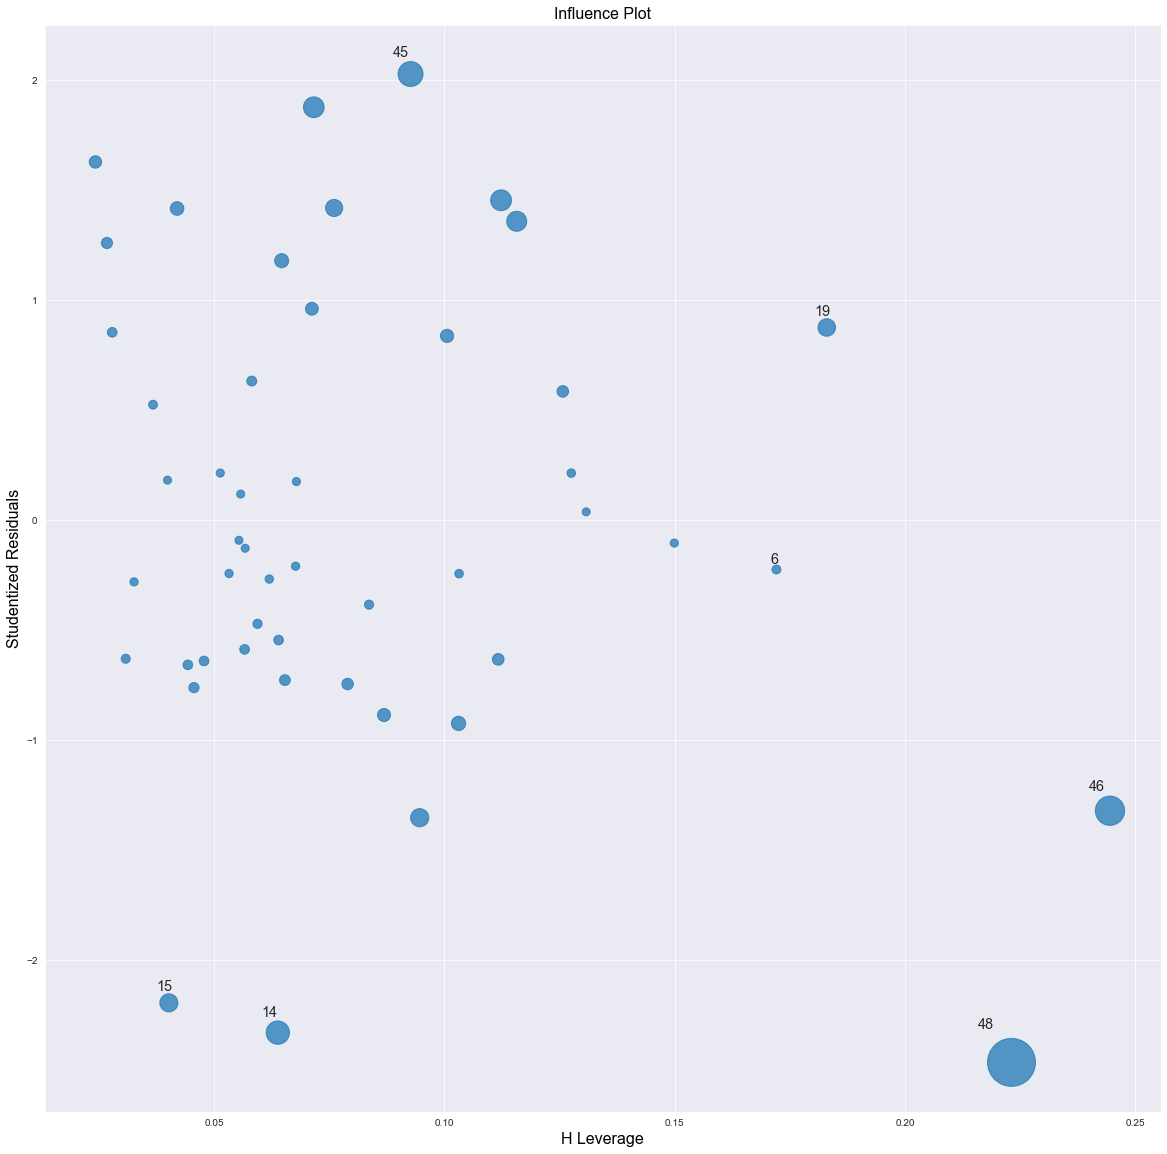

In [62]:
fig,ax= plt.subplots(figsize=(20,20))
fig= influence_plot(final_model,ax = ax)

In [63]:
final_model.rsquared

0.9613162435129847

# Model Predictions

In [54]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD_Spend':70000,"Administration":90000,"Marketing_Spend":140000},index=[0])
new_data

,RnD_Spend,Administration,Marketing_Spend
0,70000,90000,140000


In [64]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [65]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(startupsNew)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# table containing R^2 value for each prepared model

In [66]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
